In [1]:
import cv2 as cv
import PIL
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import zipfile
import os
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/data_output.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [4]:
import pathlib
path="/tmp/data_output/train/"
len(list(pathlib.Path(path).glob("*/")))

15

In [5]:
str(list(pathlib.Path(path).glob("*/"))[-1])

'/tmp/data_output/train/7'

In [6]:
ctg=[str(i).split("/")[-1] for i in list(pathlib.Path("/tmp/data_output/train/").glob("*/"))]
ctg

['(', '4', '0', '6', ')', '9', '2', '3', '+', '8', 'times', '-', '5', '1', '7']

In [7]:
labelsDir={}
for i in ctg:
    print(f"{i}:{len(list(pathlib.Path('/tmp/data_output/train/'+i).glob('*')))}")

(:10005
4:5177
0:4839
6:2182
):10048
9:2615
2:18298
3:7636
+:17578
8:2147
times:2925
-:23797
5:2481
1:18564
7:2036


# Split in Train and Test

In [8]:
# import splitfolders

In [9]:
# splitfolders.ratio("data/",output="data_output/",seed=42,ratio=(0.7,0.2,0.1),group_prefix=None)

# Img Augmentation and Loading

In [10]:
train_datagram=ImageDataGenerator(rescale=1./255,
                                 rotation_range=20,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=False)
x_train=train_datagram.flow_from_directory("/tmp/data_output/train",
                                          target_size=(28,28),
                                          batch_size=32,
                                           color_mode="grayscale",
                                          class_mode="sparse")


Found 130328 images belonging to 15 classes.


In [11]:
# y_train=x_train.classes
# y_train

In [12]:
val_datagram=ImageDataGenerator(rescale=1./255,
                                 horizontal_flip=False)
x_val=val_datagram.flow_from_directory("/tmp/data_output/val",
                                          target_size=(28,28),
                                          batch_size=32,
                                           color_mode="grayscale",
                                          class_mode="sparse")
# y_val=x_val.classes

Found 36397 images belonging to 14 classes.


# Model

In [14]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(256,(3,3),activation="relu",input_shape=(28,28,1),padding="same"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


# model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(256,activation="relu"))
model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dense(64,activation="relu"))
model.add(keras.layers.Dense(32,activation="relu"))
model.add(keras.layers.Dense(15,activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 256)       2560      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)         0

In [15]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [16]:
history=model.fit(x_train,validation_data=x_val,epochs=10,batch_size=200)

Epoch 1/10
4073/4073 [==============================] - 135s 30ms/step - loss: 0.5190 - accuracy: 0.8399 - val_loss: 0.1735 - val_accuracy: 0.9512
Epoch 2/10
4073/4073 [==============================] - 120s 30ms/step - loss: 0.2423 - accuracy: 0.9283 - val_loss: 0.1395 - val_accuracy: 0.9592
Epoch 3/10
4073/4073 [==============================] - 118s 29ms/step - loss: 0.2039 - accuracy: 0.9393 - val_loss: 0.1255 - val_accuracy: 0.9635
Epoch 4/10
4073/4073 [==============================] - 126s 31ms/step - loss: 0.1870 - accuracy: 0.9451 - val_loss: 0.1211 - val_accuracy: 0.9662
Epoch 5/10
4073/4073 [==============================] - 116s 28ms/step - loss: 0.1747 - accuracy: 0.9480 - val_loss: 0.1246 - val_accuracy: 0.9652
Epoch 6/10
4073/4073 [==============================] - 117s 29ms/step - loss: 0.1683 - accuracy: 0.9501 - val_loss: 0.1128 - val_accuracy: 0.9675
Epoch 7/10
4073/4073 [==============================] - 117s 29ms/step - loss: 0.1568 - accuracy: 0.9533 - val_loss: 0

In [17]:
# Sampling Still pending(ensemble model,over sampling)
model.save("FinalModel.h5")

# Model Evaluation

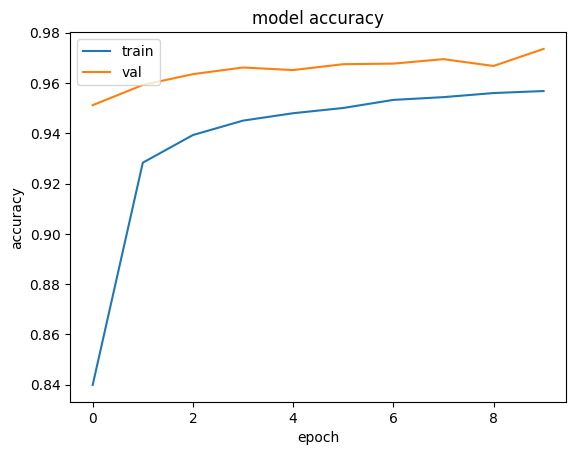

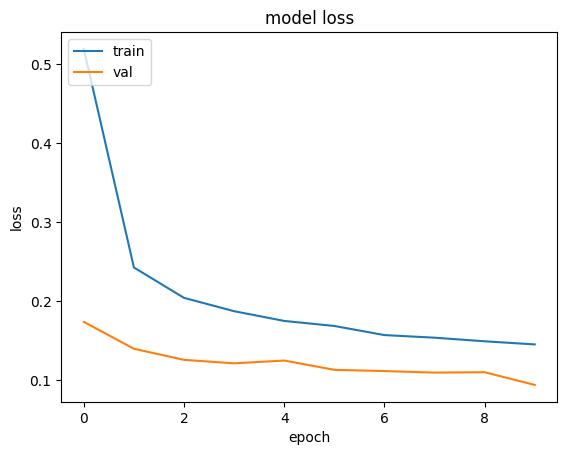

In [18]:
#  summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [19]:
test_datagram=ImageDataGenerator(rescale=1./255,
                                 horizontal_flip=False)

x_test=test_datagram.flow_from_directory("/tmp/data_output/test",
                                          target_size=(28,28),
                                          batch_size=32,
                                           color_mode="grayscale",
                                          class_mode="sparse",
                                         shuffle = False)
y_test=x_test.classes

Found 18215 images belonging to 14 classes.


In [20]:
# model.evaluate(x_train)

In [21]:
model.evaluate(x_test)

570/570 [==============================] - 8s 14ms/step - loss: 0.0982 - accuracy: 0.9727


[0.09816396236419678, 0.9727147817611694]

In [22]:
# Single Image Predict

In [23]:
from keras.preprocessing import image
# E:\tfGPU\Mathematical Exp\data_output\test\5\5_39045.jpg
path='/tmp/data_output/test/5/5_39045.jpg'
testImg=keras.utils.load_img(path,target_size=(28,28),color_mode="grayscale")
testImg=keras.utils.img_to_array(testImg)
testImg=np.expand_dims(testImg,axis=0)
print(f"Predicted:{np.argmax(model.predict(testImg))} Actual:{x_train.class_indices['5']}")

1/1 [==============================] - 0s 224ms/step
Predicted:9 Actual:9


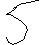

In [24]:
PIL.Image.open(path)

In [25]:
from keras.preprocessing import image

def getPredict(path,s):
  img=keras.utils.load_img(path,target_size=(28,28),color_mode="grayscale")
  img=keras.utils.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  print(model.predict(img))
  print(f"Predicted:{np.argmax(model.predict(img))} Actual:{x_train.class_indices[s]}")

In [26]:
getPredict('/tmp/data_output/test/)/)_100093.jpg',')')

1/1 [==============================] - 0s 22ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 20ms/step
Predicted:1 Actual:1


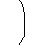

In [27]:
PIL.Image.open('/tmp/data_output/test/)/)_100093.jpg')

In [28]:
getPredict('/tmp/data_output/test/+/+_10019.jpg','+')

1/1 [==============================] - 0s 24ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 24ms/step
Predicted:2 Actual:2


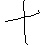

In [29]:
PIL.Image.open('/tmp/data_output/test/+/+_10019.jpg')

# Classification Report

In [30]:
temp={}
for i in range(22):
    temp[i]=0
for i in x_test.classes:
    temp[i]+=1
temp

{0: 1431,
 1: 1436,
 2: 2512,
 3: 3401,
 4: 693,
 5: 2652,
 6: 2615,
 7: 1092,
 8: 740,
 9: 355,
 10: 313,
 11: 292,
 12: 308,
 13: 375,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0}

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2.]


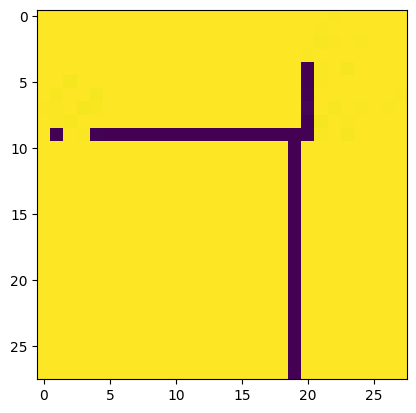

In [32]:
# for i in range(1435):
#   x_test.next()
img,label=x_test.next()
plt.imshow(img[0])
print(label)

In [33]:
x_test.class_indices

{'(': 0,
 ')': 1,
 '+': 2,
 '-': 3,
 '0': 4,
 '1': 5,
 '2': 6,
 '3': 7,
 '4': 8,
 '5': 9,
 '6': 10,
 '7': 11,
 '8': 12,
 '9': 13}

In [34]:
y_pred=model.predict(x_test)
y_pred=[np.argmax(i) for i in y_pred]
#get classification report
print(classification_report(y_pred,y_test))

570/570 [==============================] - 9s 15ms/step
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1495
           1       0.98      0.98      0.98      1442
           2       0.98      0.98      0.98      2516
           3       1.00      0.98      0.99      3448
           4       0.99      0.98      0.99       701
           5       0.93      0.96      0.94      2547
           6       0.98      0.99      0.99      2589
           7       0.98      0.99      0.98      1083
           8       0.97      0.95      0.96       753
           9       0.96      0.97      0.97       350
          10       0.95      0.98      0.97       304
          11       0.92      0.93      0.93       289
          12       0.95      0.98      0.97       300
          13       1.00      0.94      0.97       396
          14       0.00      0.00      0.00         2

    accuracy                           0.97     18215
   macro avg       0.90 

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [100]:
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
# img=cv2.imread("/test.jpeg",cv2.IMREAD_GRAYSCALE)

def getContours(img):
  if img is not None:
  #     images.append(img)
      img=~img
      ret,thresh=cv2.threshold(img,100,255,cv2.THRESH_BINARY)
      ctrs=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)[0]
      cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
      w=int(28)
      h=int(28)
      train_data=[]
  #     print(len(cnt))
      rects=[]
      for c in cnt :
          x,y,w,h= cv2.boundingRect(c)
          rect=[x,y,w,h]
          rects.append(rect)
      #print(rects)
      bool_rect=[]
      for r in rects:
          l=[]
          for rec in rects:
              flag=0
              if rec!=r:
                  if r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10):
                      flag=1
                  l.append(flag)
              if rec==r:
                  l.append(0)
          bool_rect.append(l)
      #print(bool_rect)
      dump_rect=[]
      for i in range(0,len(cnt)):
          for j in range(0,len(cnt)):
              if bool_rect[i][j]==1:
                  area1=rects[i][2]*rects[i][3]
                  area2=rects[j][2]*rects[j][3]
                  if(area1==min(area1,area2)):
                      dump_rect.append(rects[i])
      #print(len(dump_rect)) 
      final_rect=[i for i in rects if i not in dump_rect]
      #print(final_rect)
      for r in final_rect:
          x=r[0]
          y=r[1]
          w=r[2]
          h=r[3]
          im_crop =thresh[y:y+h+40,x:x+w+0]
          

          im_resize = cv2.resize(im_crop,(28,28))
          cv2_imshow(im_resize)
          # cv2.waitKey(0)
          # cv2.destroyAllWindows()

          im_resize=np.reshape(im_resize,(1,28,28))
          train_data.append(im_resize)
      return train_data
  else:
    print("Img is None")

In [101]:
labels={0:'(',1:')',2:'+',3:'-',4:'0',5:'1',6:'2',7:'3',8:'4',9:'5',10:'6',11:'7',12:'8',13:'9',14:'*'}

def solveEqu(img):
    data=getContours(img)
    equ=""
    ind=""
    for i in data:
        img=np.array(i)
        index=np.argmax(model.predict(img))
        ind+=" "+str(index)
        equ+=labels[index]
    print("Equ is:",equ)
    print("Index are:",ind)
    # print(f"Sol.:",eval(equ))
        


1/1 [==============================] - 0s 19ms/step
Equ is: 4+4
Index are:  8 2 8


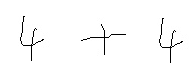

In [102]:
img=cv2.imread("/content/testAdd.png",cv2.IMREAD_GRAYSCALE)
solveEqu(img)
cv2_imshow(img)

1/1 [==============================] - 0s 28ms/step
Equ is: 4-2
Index are:  8 3 6


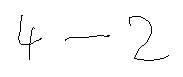

In [105]:
img=cv2.imread("/content/testSub.png",cv2.IMREAD_GRAYSCALE)
solveEqu(img)
cv2_imshow(img)

In [109]:
# img=cv2.imread("/content/testMult.png",cv2.IMREAD_GRAYSCALE)
# solveEqu(img)
# cv2_imshow(img)